<a href="https://colab.research.google.com/github/shadenWq/Regression/blob/main/linear_regression_insurance_dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn import datasets

In [20]:
df=pd.read_csv("insurance.csv")

# EDA

In [21]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   int64  
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   int64  
 5   region    1338 non-null   int64  
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(5)
memory usage: 73.3 KB


In [5]:
df.count()

age         1338
sex         1338
bmi         1338
children    1338
smoker      1338
region      1338
charges     1338
dtype: int64

In [6]:
df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


(array([536., 398., 129.,  86.,  35.,  59.,  57.,  32.,   2.,   4.]),
 array([ 1121.8739  ,  7386.729311, 13651.584722, 19916.440133,
        26181.295544, 32446.150955, 38711.006366, 44975.861777,
        51240.717188, 57505.572599, 63770.42801 ]),
 <BarContainer object of 10 artists>)

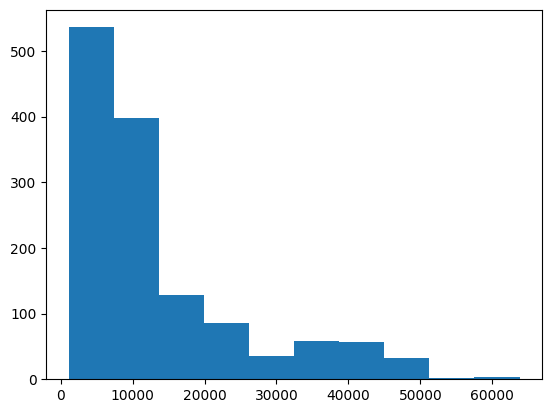

In [11]:
plt.hist(df["charges"])

In [22]:
df['sex'] = df['sex'].map({'female': 1, 'male': 0})

In [23]:
df['smoker'] = df['smoker'].map({'yes': 1, 'no': 0})

In [24]:
df['region'].unique()

array(['southwest', 'southeast', 'northwest', 'northeast'], dtype=object)

In [25]:
df['region'] = df['region'].map({'southwest': 1, 'southeast': 2,'northwest':3,'northeast':4})

<Axes: >

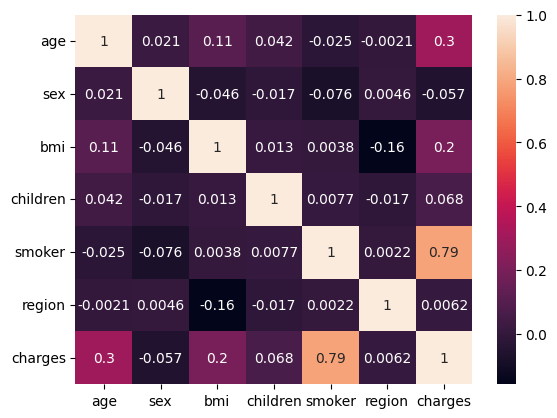

In [17]:
sns.heatmap(df.corr(), annot=True)

# Linear Regression

In [27]:
x=df.drop("charges", axis=1)
y=df["charges"]

In [28]:
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.3,random_state=23)

In [29]:
from sklearn.linear_model import LinearRegression
lm=LinearRegression()

In [30]:
lm.fit(xtrain,ytrain)

LinearRegression()

In [31]:
predictions=lm.predict(xtest)
predictions

array([ 1.14891823e+04,  6.40909856e+03,  3.16603449e+04,  1.00628632e+04,
        8.10876223e+03,  9.37157925e+03,  3.58055813e+04,  8.45771081e+03,
        1.29944467e+04,  3.96966715e+04,  1.57050470e+03,  3.70507718e+04,
        4.23657419e+03,  1.23385786e+04,  8.12482192e+03,  5.08395167e+03,
        5.35402656e+03,  3.53259179e+03,  3.54168239e+04,  3.32162171e+04,
        3.89611414e+04,  1.35122961e+04,  8.16992141e+03,  9.70512987e+03,
        3.59253106e+04,  7.03079293e+03,  5.24782428e+03,  2.93211582e+04,
        5.51087549e+02,  1.13129683e+04,  1.36495384e+04,  4.93242756e+03,
        3.86648203e+03,  1.19644550e+04,  8.95700850e+03,  2.92567495e+04,
        1.12024047e+04,  1.06305280e+04,  9.76292042e+03,  4.46165136e+03,
        1.08676803e+04,  3.42958650e+04,  1.12233816e+04,  3.19061467e+04,
        1.13116850e+04,  1.35173352e+04,  4.40133325e+03,  5.43935233e+03,
        8.70107859e+03,  5.32477050e+03,  1.34567243e+04,  8.96597805e+03,
        1.03461062e+04,  

In [41]:
realValues = np.array(ytest)
realValues

array([13041.921  ,  5031.26955, 20984.0936 , 25656.57526,  3201.24515,
        7256.7231 , 41999.52   , 12404.8791 , 14001.1338 , 47269.854  ,
        2597.779  , 29330.98315,  2741.948  , 14256.1928 ,  6238.298  ,
        4746.344  ,  6652.5288 ,  2250.8352 , 41676.0811 , 39836.519  ,
       47928.03   ,  7650.77375,  6457.8434 , 11837.16   , 42211.1382 ,
        4837.5823 ,  4894.7533 , 36219.40545,  2201.0971 ,  8556.907  ,
       12644.589  ,  2473.3341 ,  4032.2407 , 13224.693  ,  5584.3057 ,
       19350.3689 , 12479.70895,  7261.741  , 30284.64294,  3537.703  ,
       11165.41765, 40003.33225, 10264.4421 , 21098.55405, 11554.2236 ,
        9880.068  ,  4340.4409 ,  4435.0942 , 26140.3603 , 27375.90478,
       11674.13   ,  6338.0756 ,  9724.53   ,  3443.064  ,  3490.5491 ,
       10579.711  , 10602.385  ,  8527.532  ,  7325.0482 , 33475.81715,
       35491.64   ,  4076.497  ,  1137.4697 ,  3943.5954 ,  2523.1695 ,
        5469.0066 , 14133.03775,  1141.4451 ,  4133.64165, 26125

In [32]:
lm.intercept_

-14045.806099344214

In [33]:
lm.coef_

array([  245.94487173,   173.89871781,   348.73926682,   546.84795959,
       24234.33665543,   524.00517078])

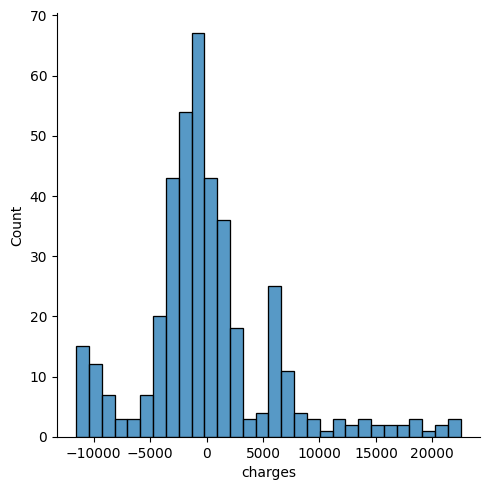

In [34]:
sns.displot((ytest-predictions))

<ipython-input-42-99f943920f33>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot((ytest-predictions),bins=20);


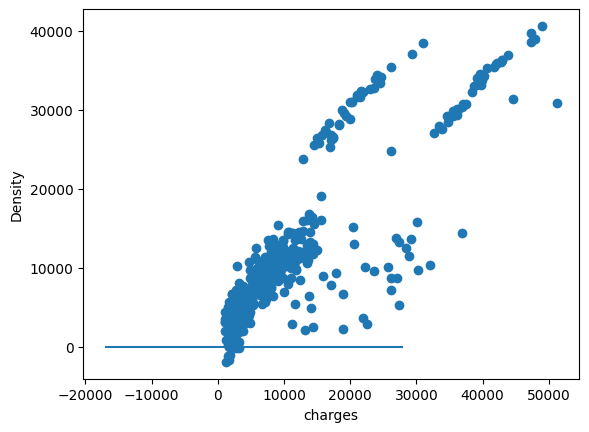

In [42]:
plt.scatter(realValues,predictions);
sns.distplot((ytest-predictions),bins=20);

# evaluation metrics

In [35]:
from sklearn import metrics
metrics.mean_absolute_error(ytest,predictions)

4044.9876601373285

In [36]:
metrics.mean_squared_error(ytest,predictions)

35359546.654409066

In [37]:
np.sqrt(metrics.mean_squared_error(ytest,predictions))

5946.389379649559

In [38]:
metrics.r2_score(ytest, predictions)

0.7289379757416039